In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
%matplotlib inline

# Data Exploration

X.shape: (26, 2)


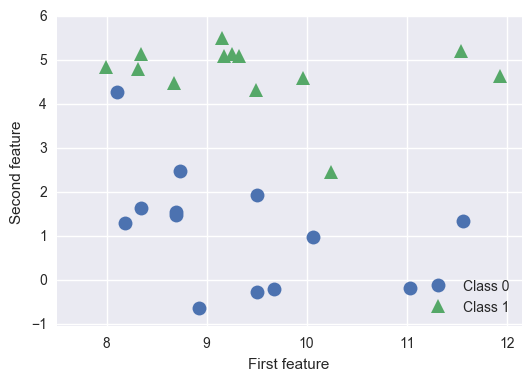

In [2]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
# Plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

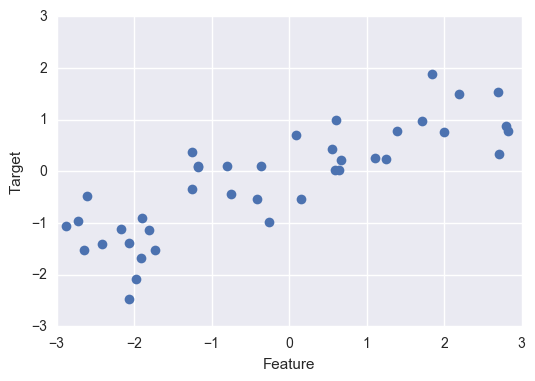

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

print('Shape of cancer data: {}'.format(cancer.data.shape))
print('Sample counts per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('Feature names:\n{}'.format(cancer.feature_names))

cancer.keys(): 
dict_keys(['target', 'data', 'feature_names', 'target_names', 'DESCR'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'benign': 357, 'malignant': 212}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [50]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


# K-Nearest Neighbors

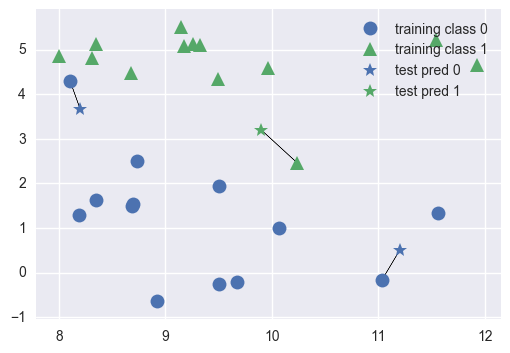

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

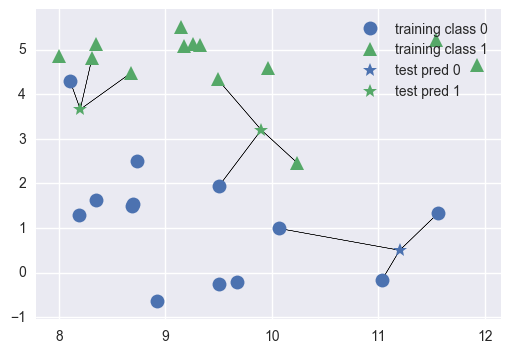

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print('Test set prediction: {}'.format(clf.predict(X_test)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set prediction: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


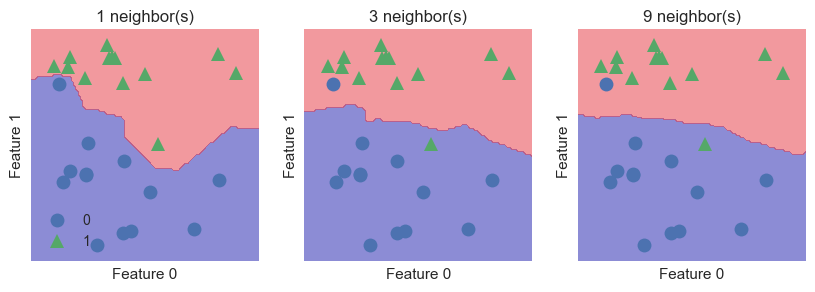

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # The fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend(loc=3)

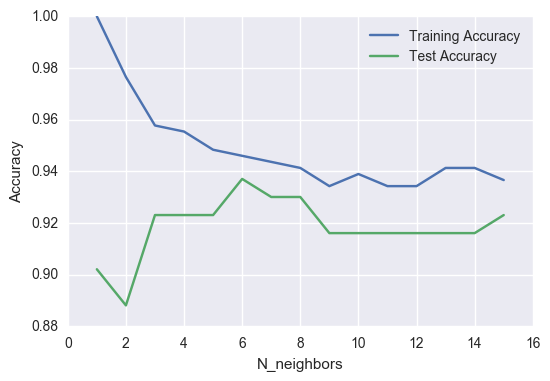

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target
                                                   , stratify=cancer.target,
                                                   random_state=66)
training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # Record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization/test accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('N_neighbors')
plt.legend()

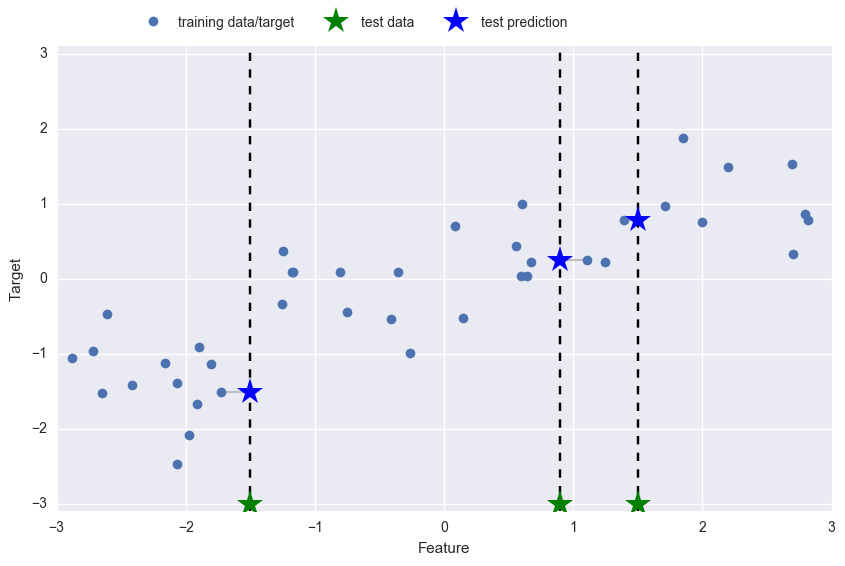

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

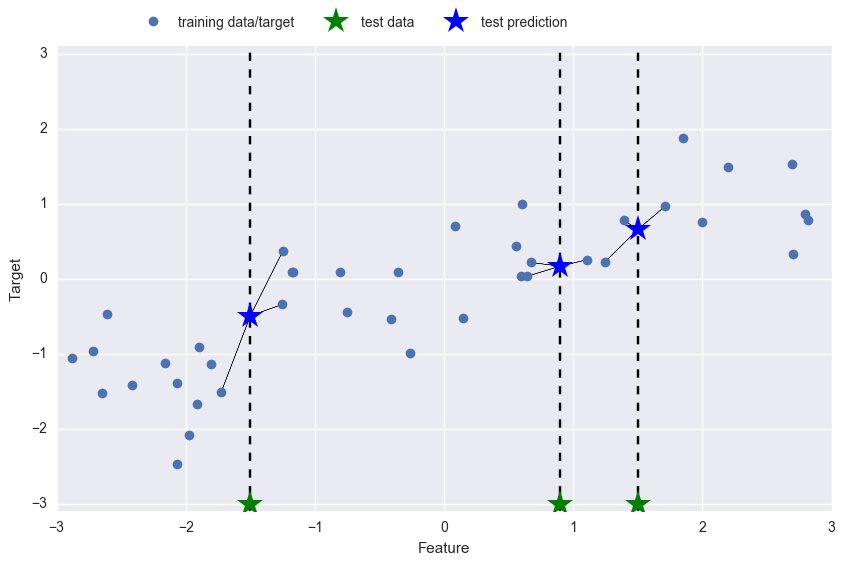

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors to consider 3
clf = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

print('Test set prediction:\n{}'.format(clf.predict(X_test)))
print('Test set R^2: {:.2f}'.format(clf.score(X_test, y_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


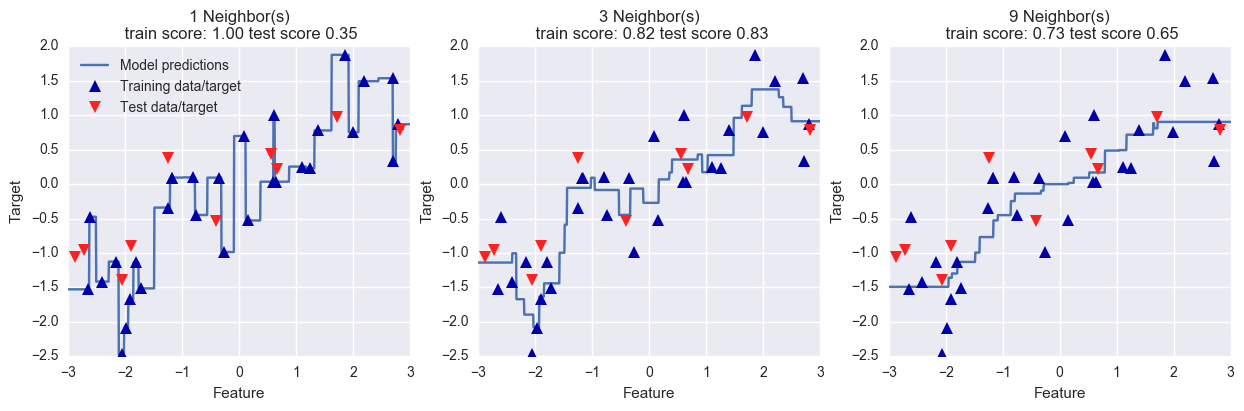

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make prediction using 1, 3, or 9 neighbors
    clf = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, clf.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} Neighbor(s)\n train score: {:.2f} test score {:.2f}'.format(
        n_neighbors, clf.score(X_train, y_train), clf.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target']
              , loc='best')

# Linear Models

w[0]: 0.393906  b: -0.031804


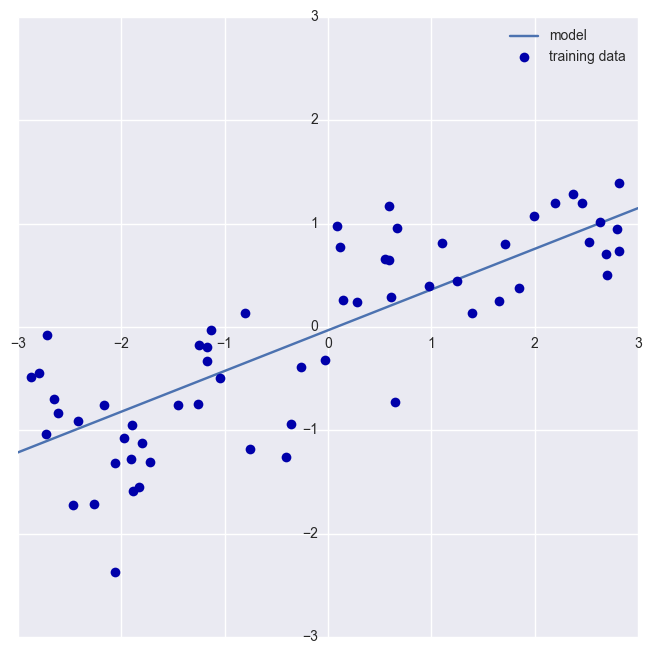

In [52]:
mglearn.plots.plot_linear_regression_wave()

In [78]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print('clf.coef_: {}'.format(lr.coef_))
print('clf.intercept_: {}'.format(lr.intercept_))
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

clf.coef_: [ 0.39390555]
clf.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [79]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [73]:
from sklearn.linear_model import Ridge

clf = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [74]:
clf_10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf_10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [75]:
clf_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf_01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


#### RidgeRegression has L2 regularization with the variable alpha. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but help generalization.

#### More alpha = More restriction, simpler model

#### Less alpha = Less restriction, complex model

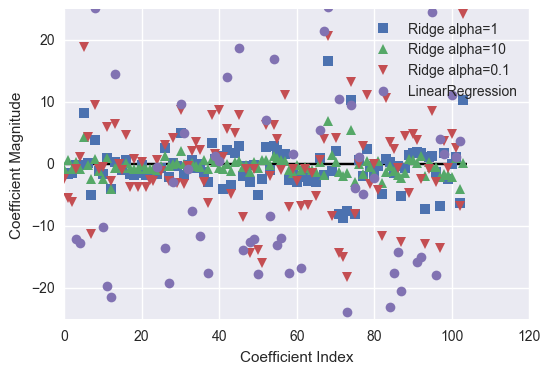

In [88]:
plt.plot(clf.coef_, 's', label='Ridge alpha=1')
plt.plot(clf_10.coef_, '^', label='Ridge alpha=10')
plt.plot(clf_01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

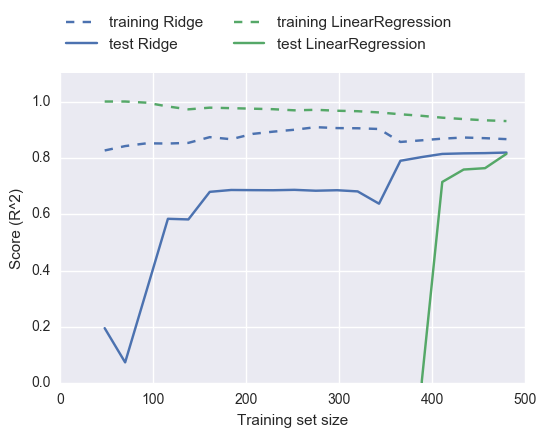

In [89]:
mglearn.plots.plot_ridge_n_samples()

In [92]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [96]:
# We increase the default setting of 'max_iter',
# Otherwise the model would warn us that we should increase max_iter

lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso_001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [97]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso_00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94
